<a href="https://colab.research.google.com/github/eric-sun92/pytorch_intro/blob/01_pytorch_workflow/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [ ]:
# Prepare and load data

# 1. Get data into a numerical representation.
# 2. Build a model to learn patterns in that numerical representation.


# Create known parameters
weight = 0.7
bias = 0.3


start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)

y = weight * X + bias

X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
X.shape, y.shape

(torch.Size([50, 1]), torch.Size([50, 1]))

In [ ]:
# split data into train and test sets

train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

# future just use sklearn 

len(X_train), len(y_train), len(X_test), len(y_test)


(40, 40, 10, 10)

In [ ]:
# building plot to visualize data

def plot_predictions(train_data=X_train, 
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10, 7))

  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

  plt.scatter(test_data, test_labels, c="g", s=4, label="Test Data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
  
  plt.legend(prop={"size": 14})



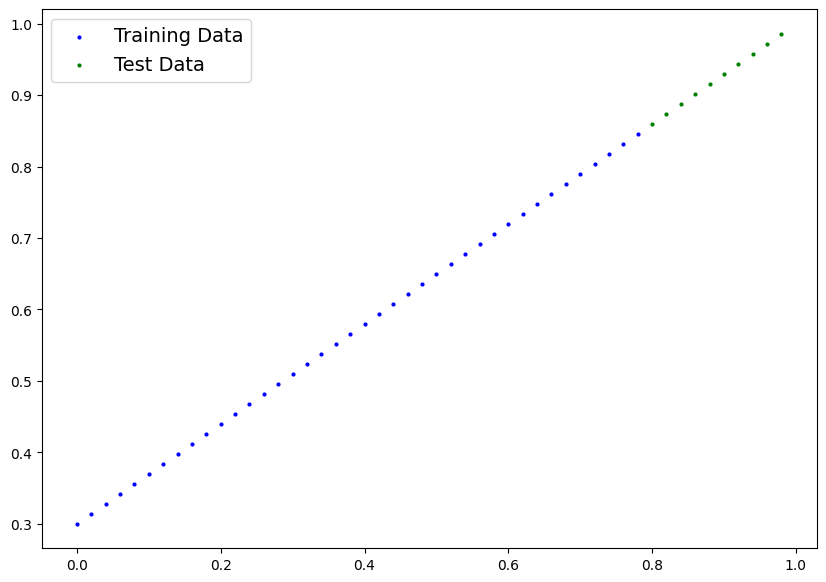

In [ ]:
plot_predictions()

In [ ]:
# build model to run computation
import torch.nn as nn

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, 
                                        requires_grad=True,
                                            dtype=torch.float))

# Forward method to define computation in the model

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias




In [ ]:
# create a manual seed

torch.manual_seed(42)

#create an instance of the model we created

model_0 = LinearRegressionModel()

# check out parameters
one, two = model_0.parameters()
print(one, two)

X_test, y_test

Parameter containing:
tensor([0.3367], requires_grad=True) Parameter containing:
tensor([0.1288], requires_grad=True)


(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [ ]:
# make predictions with model

with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds


tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

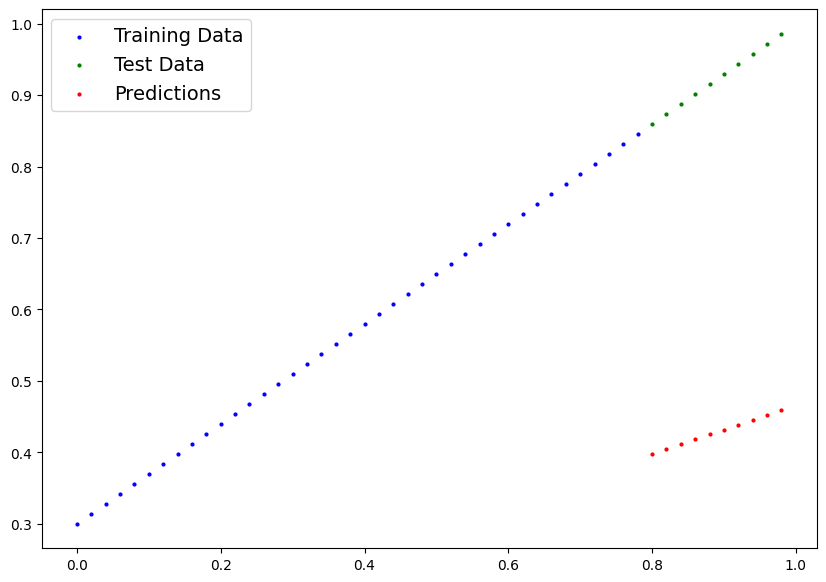

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
## train model

model_0.state_dict()

# loss function determines how far off your predictions are
# optimizer will adjust weights and bias (model parameters) to make loss less

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
#setup a loss function

loss_fn = nn.L1Loss()
loss_fn

L1Loss()

In [ ]:
#setup an optimizer
learning_rate = 0.01
optimizer = torch.optim.SGD(model_0.parameters(), 
                            lr=learning_rate)

#training loop
num_epochs = 100

for epoch in range(num_epochs):
  
  model_0.train()

  y_pred = model_0(X_train)

  loss = loss_fn(y_pred, y_train)
  print(f"Loss: {loss}")

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  print(model_0.state_dict())


Loss: 0.31288138031959534
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Loss: 0.3013603389263153
OrderedDict([('weights', tensor([0.3445])), ('bias', tensor([0.1488]))])
Loss: 0.28983935713768005
OrderedDict([('weights', tensor([0.3484])), ('bias', tensor([0.1588]))])
Loss: 0.2783183455467224
OrderedDict([('weights', tensor([0.3523])), ('bias', tensor([0.1688]))])
Loss: 0.26679736375808716
OrderedDict([('weights', tensor([0.3562])), ('bias', tensor([0.1788]))])
Loss: 0.2552763521671295
OrderedDict([('weights', tensor([0.3601])), ('bias', tensor([0.1888]))])
Loss: 0.24375534057617188
OrderedDict([('weights', tensor([0.3640])), ('bias', tensor([0.1988]))])
Loss: 0.23223432898521423
OrderedDict([('weights', tensor([0.3679])), ('bias', tensor([0.2088]))])
Loss: 0.22071333229541779
OrderedDict([('weights', tensor([0.3718])), ('bias', tensor([0.2188]))])
Loss: 0.20919232070446014
OrderedDict([('weights', tensor([0.3757])), ('bias', tensor([0.2288]))])
Loss: 0.19767

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)


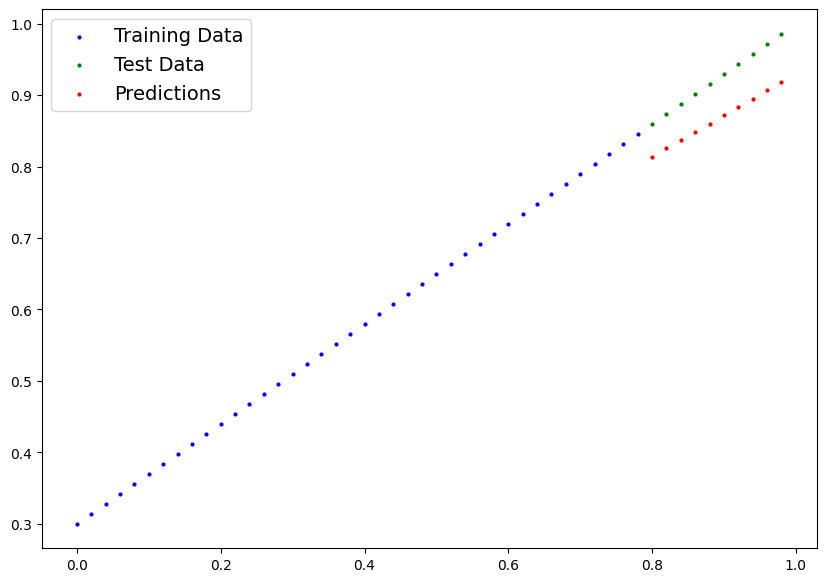

In [ ]:
plot_predictions(predictions=y_preds_new)

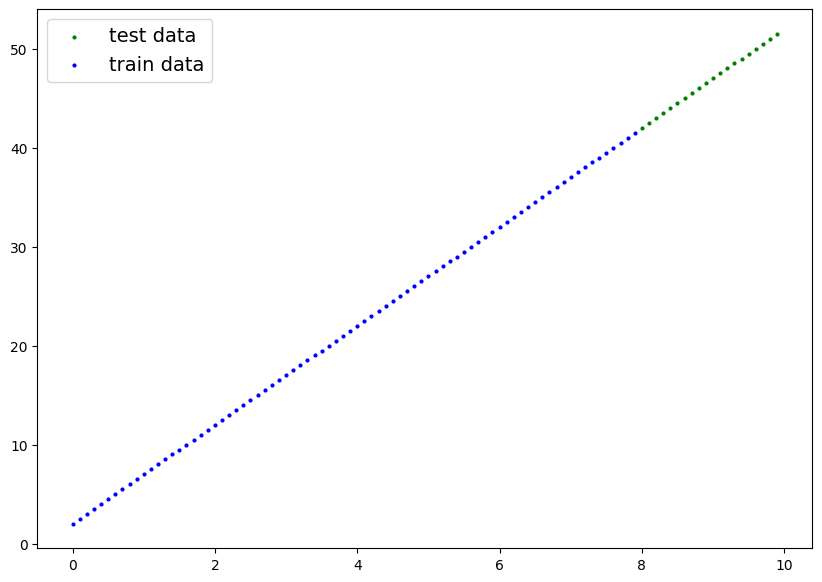

In [ ]:
# try it again on my own

weight = 5
bias = 2

a = torch.arange(0, 10, 0.1)
b = a * 5 + 2

split_test = int(len(a) * 0.8)

X_train_a = a[:split_test]
y_train_b = b[:split_test]

X_test_a = a[split_test:]
y_test_b = b[split_test:]



def prediction_plot_a(X_train=X_train_a,
                      y_train=y_train_b,
                      X_test=X_test_a,
                      y_test=y_test_b,
                      prediction=None):
  
  plt.figure(figsize=(10,7))

  plt.scatter(X_test, y_test, c="g", s=4, label="test data")

  plt.scatter(X_train, y_train, c="b", s=4, label="train data")

  if prediction is not None:
    plt.scatter(X_test, prediction, c="r", s=4, label="prediction")

  plt.legend(prop={"size":14})


prediction_plot_a()




L1Loss()
tensor([7.9732, 8.0614, 8.1496, 8.2378, 8.3261, 8.4143, 8.5025, 8.5907, 8.6790,
        8.7672, 8.8554, 8.9437, 9.0319, 9.1201, 9.2083, 9.2966, 9.3848, 9.4730,
        9.5612, 9.6495])
OrderedDict([('weight', tensor([0.8823])), ('bias', tensor([0.9150]))])


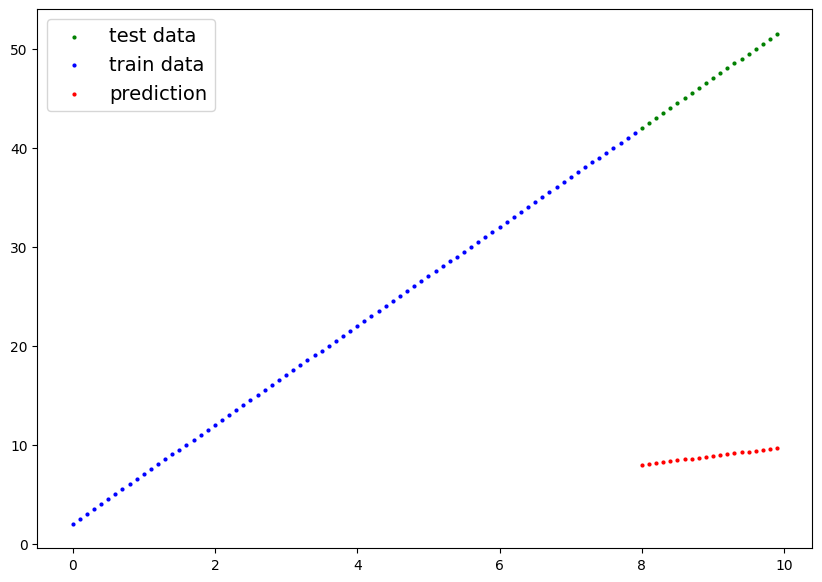

In [ ]:
# Build model

import torch.nn as nn
torch.manual_seed(42)


class LinearRegModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.rand(1, 
                                          requires_grad=True,
                                          dtype=torch.float))
    self.bias = nn.Parameter(torch.rand(1, 
                                        requires_grad=True,
                                        dtype=torch.float))
    
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.weight * x + self.bias


model_a = LinearRegModel()

num_iters = 500

learning_rate = 0.005

loss_function = nn.L1Loss()
print(loss_function)

optimizer_a = torch.optim.SGD(model_a.parameters(), lr=learning_rate)

# test

with torch.inference_mode():
  y_preds_a = model_a(X_test_a)

print(y_preds_a)

print(model_a.state_dict())


prediction_plot_a(prediction = y_preds_a)

In [ ]:
for epoch in range(num_iters):
  model_a.train()

  y_pred_a_new = model_a(X_train_a)

  loss = loss_function(y_pred_a_new, y_train_b)

  optimizer_a.zero_grad()

  loss.backward()

  optimizer_a.step()


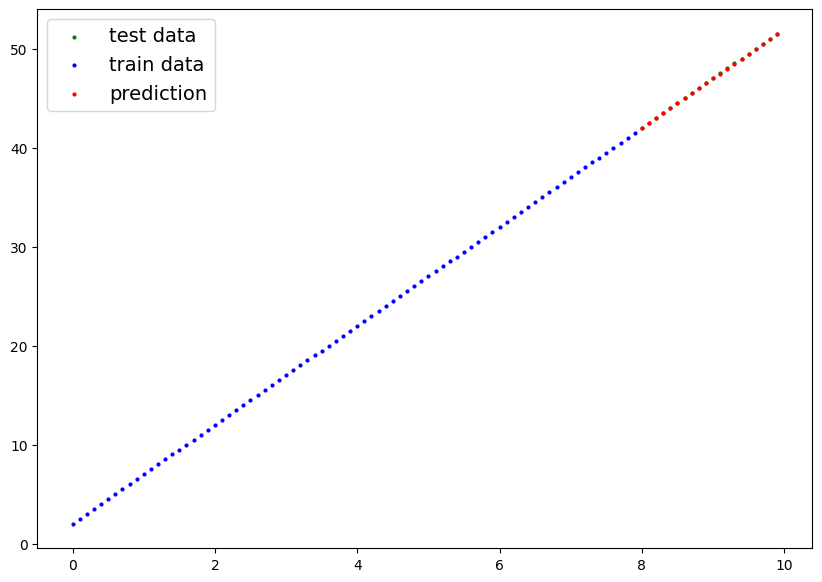

In [ ]:
with torch.inference_mode():
  y_new = model_a(X_test_a)

prediction_plot_a(prediction=y_new)

In [ ]:

# saving a model in pytorch

# three main methods for saving/loading models in pytorch

# 1. torch.save() -> saves a pytorch object in python's pickle format
# 2. torch.load() -> load a saved pytorch object
# 3. torch.nn.Module.load_state_dict() -> load a model's saved state dictionary


model_a.state_dict()

OrderedDict([('weight', tensor([4.9991])), ('bias', tensor([1.9950]))])

In [ ]:
from pathlib import Path

#1 Create models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2 Create model save path

MODEL_NAME = '01_pytorch_workflow_model_0.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH


PosixPath('models/01_pytorch_workflow_model_0.pth')

In [ ]:
# save model state dict
print(f'model save path: {MODEL_SAVE_PATH}')
torch.save(model_0.state_dict(), MODEL_SAVE_PATH)



model save path: models/01_pytorch_workflow_model_0.pth


In [28]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [29]:
# to load saved state dict, instantiate a new instance of model class

loaded_model_0 = LinearRegressionModel()

#load saved state dict of model 0 (this will update new instance with updated paramters)

loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.4740])), ('bias', tensor([0.1978]))])

In [30]:
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [31]:
loaded_model_0.state_dict(
)

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [32]:
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

In [33]:
# compare loaded preds with original preds

y_preds_new == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

'2.0.1+cu118'